# Motor Insurance Case Study

The purpose of this notebook is to apply the CRISPDM steps of data understanding and data preparation, using 
the data from the Motor Insurance Case Study. We do this by preparing the **Data Quality Report** and the **Data Quality Plan** for the given dataset. For a description of the business problem and analytics solution, as well as details about the problem domain and features, please consult the FMLPDA textbook.

1. ## Data Understanding: Data Quality Report (Lab 3)
The data quality report uses tables and visualisations to explore the data.
For each feature in the dataframe, we prepare summary tables (with descriptive stats) and plots.

    Tables: One table for continuous features and one table for categorical features. We need to have an understanding of what the features mean, to be able to decide an initial grouping of features into continuous and categorical. Please consult the FMLPDA textbook to get an understanding of the feature meaning.

    Plots: For continuous features, we prepare histograms and box plots. For categorical features, we prepare bar plots. Lab3 and Lab 4 show example steps and code for how to do this.

    The Data Quality Report helps us identify potential problems and erros in the data.

2. ## Data Understanding: Data Quality Plan (Lab 4)
The data quality plan is a set of strategies to handle potential problems in the data.
We aim to find potential data quality problems and to prepare a table which lists for each feature, the problem found and potential solutions for fixing the problem. We also list the first action we are going to take for each feature, e.g., leave as is, remove extreme outliers, replace missing data, drop feature if too many missing values, etc. If there is no issue with the feature, we also state this, eg no issues, keep as is. We usually try to preserve or recover as much data as possible. Before discarding features, first check if the missing values or the incorrect values can be corrected. It is also a good idea to check the pairwise relationship with the target feature, so we don't discard features that are highly predictive of the target.

## Data Quality Report: Tables


In [30]:
# From your virtul environment, install the pandas package for working with data frames: 
# pip install pandas
# pandas is an open source Python library for data analysis
# A data frame allows us to read and access data stored in spreadsheet (.csv) format
# Good tutorial on pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
# Pandas Cookbook: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
# Another good resource for pandas: http://chrisalbon.com/python/pandas_dataframe_importing_csv.htm

#Import the required packages
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

In [32]:
# Reading from a csv file, into a data frame
# Can set parameters to remove white space from the beginning and end of column names
# Read more about .read_csv() here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv('MotorInsuranceFraudClaimABTFull.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
#How many rows should be displayed in full
pd.set_option('display.max_rows', 100)
# Show data frame first few rows
df.head(50)

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.000000,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.000000,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.000000,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.000000,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.000000,0,1
5,6,CI,0,NaN,1,Broken Limb,Yes,17480,0,0,0.0,0.000000,17480,0
6,7,CI,52567,Single,3,Broken Limb,No,3017,18102,2,1.0,0.500000,0,1
7,8,CI,0,NaN,2,Back,Yes,7463,0,0,0.0,0.000000,7463,0
8,9,CI,0,NaN,1,Soft Tissue,No,2067,0,0,NaN,0.000000,2067,0
9,10,CI,42300,Married,4,Back,No,2260,0,0,0.0,0.000000,2260,0


In [33]:
# Check how many rows and columns this dataframe has
df.shape

(500, 14)

There are 500 examples/rows and 14 features/columns in this dataset.

In [34]:
# Show the data types in each column.
# int64 and float64 are numeric columns.
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'.
# Some of the type 'object' columns may be more appropriate as continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
# You can see below that some columns are wrongly set to continuous types, e.g., ID.
df.dtypes

ID                           int64
Insurance Type              object
Income of Policy Holder      int64
Marital Status              object
Num Claimants                int64
Injury Type                 object
Overnight Hospital Stay     object
Claim Amount                 int64
Total Claimed                int64
Num Claims                   int64
Num Soft Tissue            float64
% Soft Tissue              float64
Claim Amount Received        int64
Fraud Flag                   int64
dtype: object

In [35]:
#another way to get a summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       500 non-null    int64  
 1   Insurance Type           500 non-null    object 
 2   Income of Policy Holder  500 non-null    int64  
 3   Marital Status           170 non-null    object 
 4   Num Claimants            500 non-null    int64  
 5   Injury Type              500 non-null    object 
 6   Overnight Hospital Stay  500 non-null    object 
 7   Claim Amount             500 non-null    int64  
 8   Total Claimed            500 non-null    int64  
 9   Num Claims               500 non-null    int64  
 10  Num Soft Tissue          490 non-null    float64
 11  % Soft Tissue            500 non-null    float64
 12  Claim Amount Received    500 non-null    int64  
 13  Fraud Flag               500 non-null    int64  
dtypes: float64(2), int64(8), o

In [36]:
# Look at column names. Some have spaces in or after the name, e.g., 'Insurance Type '.
df.columns

Index(['ID', 'Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [37]:
# Clean the column names to remove white space after the name or in the name
df.columns = df.columns.str.replace(' ', '')
#df.columns = df.columns.str.replace(' ', '_')

In [38]:
df.columns

Index(['ID', 'InsuranceType', 'IncomeofPolicyHolder', 'MaritalStatus',
       'NumClaimants', 'InjuryType', 'OvernightHospitalStay', 'ClaimAmount',
       'TotalClaimed', 'NumClaims', 'NumSoftTissue', '%SoftTissue',
       'ClaimAmountReceived', 'FraudFlag'],
      dtype='object')

In [39]:
# Descriptive stats for continuous features
# Transpose the table so it looks like the table in the lecture/textbook
# One feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# We can see that Num Soft Tissue only has 490 rows defined (out of 500 rows total), so 10 rows are 
# missing this value.
# This table does not show the cardinality and the %Missing columns.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500000,144.481833,1.0,125.75,250.5,375.25,500.0
IncomeofPolicyHolder,500.0,13739.994000,20081.535489,0.0,0.00,0.0,33918.50,71284.0
NumClaimants,500.0,1.908000,1.012713,1.0,1.00,2.0,3.00,4.0
ClaimAmount,500.0,16373.204000,29426.276960,-99999.0,3322.25,5663.0,12245.50,270200.0
TotalClaimed,500.0,9597.186000,35655.686220,0.0,0.00,0.0,11282.75,729792.0
NumClaims,500.0,0.798000,2.666724,0.0,0.00,0.0,1.00,56.0
NumSoftTissue,490.0,0.234694,0.589635,0.0,0.00,0.0,0.00,5.0
%SoftTissue,500.0,0.172012,0.428015,0.0,0.00,0.0,0.00,2.0
ClaimAmountReceived,500.0,13051.942000,30547.194864,0.0,0.00,3253.5,8191.75,295303.0
FraudFlag,500.0,0.336000,0.472812,0.0,0.00,0.0,1.00,1.0


In [42]:
df[df['TotalClaimed'] >= 200000]

,ID,InsuranceType,IncomeofPolicyHolder,MaritalStatus,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
21,22,CI,0,NaN,3,Back,No,8688,729792,56,5.0,0.089286,8688,0


In [43]:
#Keep only the numeric features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['ID', 'IncomeofPolicyHolder', 'NumClaimants', 'ClaimAmount',
       'TotalClaimed', 'NumClaims', 'NumSoftTissue', '%SoftTissue',
       'ClaimAmountReceived', 'FraudFlag'],
      dtype='object')

In [44]:
# Select only the numeric features
df[numeric_columns].head()

,ID,IncomeofPolicyHolder,NumClaimants,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,0,2,1625,3250,2,2.0,1.0,0,1
1,2,0,2,15028,60112,1,0.0,0.0,15028,0
2,3,54613,1,-99999,0,0,0.0,0.0,572,0
3,4,0,3,270200,0,0,0.0,0.0,270200,0
4,5,0,4,8869,0,0,0.0,0.0,0,1


In [45]:
# Turn the feature FraudFlag into type 'category'
df['FraudFlag'] = df['FraudFlag'].astype('category')
df.dtypes

ID                          int64
InsuranceType              object
IncomeofPolicyHolder        int64
MaritalStatus              object
NumClaimants                int64
InjuryType                 object
OvernightHospitalStay      object
ClaimAmount                 int64
TotalClaimed                int64
NumClaims                   int64
NumSoftTissue             float64
%SoftTissue               float64
ClaimAmountReceived         int64
FraudFlag                category
dtype: object

In [46]:
#List how many times each level of the feature appears in the dataset.
# By default this does now show the NaN values. The option .value_counts(dropna=False) keeps the NaN values.
df['FraudFlag'].value_counts(dropna=False)

FraudFlag
0    332
1    168
Name: count, dtype: int64

In [47]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['InsuranceType', 'MaritalStatus', 'InjuryType',
       'OvernightHospitalStay'],
      dtype='object')

In [48]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes    

ID                          int64
InsuranceType            category
IncomeofPolicyHolder        int64
MaritalStatus            category
NumClaimants                int64
InjuryType               category
OvernightHospitalStay    category
ClaimAmount                 int64
TotalClaimed                int64
NumClaims                   int64
NumSoftTissue             float64
%SoftTissue               float64
ClaimAmountReceived         int64
FraudFlag                category
dtype: object

In [49]:
# Turn the feature ID into type 'object' so it is not used during descriptive stats
df['ID'] = df['ID'].astype('object')
df.dtypes

ID                         object
InsuranceType            category
IncomeofPolicyHolder        int64
MaritalStatus            category
NumClaimants                int64
InjuryType               category
OvernightHospitalStay    category
ClaimAmount                 int64
TotalClaimed                int64
NumClaims                   int64
NumSoftTissue             float64
%SoftTissue               float64
ClaimAmountReceived         int64
FraudFlag                category
dtype: object

In [50]:
#Update the numeric features, after converting ID and flag to 'category'.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['IncomeofPolicyHolder', 'NumClaimants', 'ClaimAmount', 'TotalClaimed',
       'NumClaims', 'NumSoftTissue', '%SoftTissue', 'ClaimAmountReceived'],
      dtype='object')

In [51]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,InsuranceType,MaritalStatus,InjuryType,OvernightHospitalStay,FraudFlag
0,CI,NaN,Soft Tissue,No,1
1,CI,NaN,Back,Yes,0
2,CI,Married,Broken Limb,No,0
3,CI,NaN,Serious,Yes,0
4,CI,NaN,Soft Tissue,No,1


In [52]:
# Descriptive stats for categorical features only.
df[category_columns].describe().T

,count,unique,top,freq
InsuranceType,500,1,CI,500
MaritalStatus,170,3,Married,99
InjuryType,500,4,Broken Limb,177
OvernightHospitalStay,500,2,No,354
FraudFlag,500,2,0,332


In [53]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [54]:
# Check for duplicate columns
#First transpose the df, so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


# Next we finalise the data quality report and add columns on %missing and cardinality of features.

In [55]:
# Look once again at the summary stats table for numeric features
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
IncomeofPolicyHolder,500.0,13739.994000,20081.535489,0.0,0.00,0.0,33918.50,71284.0
NumClaimants,500.0,1.908000,1.012713,1.0,1.00,2.0,3.00,4.0
ClaimAmount,500.0,16373.204000,29426.276960,-99999.0,3322.25,5663.0,12245.50,270200.0
TotalClaimed,500.0,9597.186000,35655.686220,0.0,0.00,0.0,11282.75,729792.0
NumClaims,500.0,0.798000,2.666724,0.0,0.00,0.0,1.00,56.0
NumSoftTissue,490.0,0.234694,0.589635,0.0,0.00,0.0,0.00,5.0
%SoftTissue,500.0,0.172012,0.428015,0.0,0.00,0.0,0.00,2.0
ClaimAmountReceived,500.0,13051.942000,30547.194864,0.0,0.00,3253.5,8191.75,295303.0


In [56]:
# df.count() gives the number of rows with non-NAN feature value
# Instead of df.isnull().sum() we can use the functions df.shape and df.count()
# numeric_columns_missing = df.shape[0] - df[numeric_columns].count()

# Prepare %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
IncomeofPolicyHolder,0.0
NumClaimants,0.0
ClaimAmount,0.0
TotalClaimed,0.0
NumClaims,0.0
NumSoftTissue,2.0
%SoftTissue,0.0
ClaimAmountReceived,0.0


In [57]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
IncomeofPolicyHolder,171
NumClaimants,4
ClaimAmount,493
TotalClaimed,235
NumClaims,7
NumSoftTissue,5
%SoftTissue,9
ClaimAmountReceived,329


In [58]:
# Add missing values column
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("MotorInsurance-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table


,count,mean,std,min,25%,50%,75%,max,%missing,card
IncomeofPolicyHolder,500.0,13739.994000,20081.535489,0.0,0.00,0.0,33918.50,71284.0,0.0,171
NumClaimants,500.0,1.908000,1.012713,1.0,1.00,2.0,3.00,4.0,0.0,4
ClaimAmount,500.0,16373.204000,29426.276960,-99999.0,3322.25,5663.0,12245.50,270200.0,0.0,493
TotalClaimed,500.0,9597.186000,35655.686220,0.0,0.00,0.0,11282.75,729792.0,0.0,235
NumClaims,500.0,0.798000,2.666724,0.0,0.00,0.0,1.00,56.0,0.0,7
NumSoftTissue,490.0,0.234694,0.589635,0.0,0.00,0.0,0.00,5.0,2.0,5
%SoftTissue,500.0,0.172012,0.428015,0.0,0.00,0.0,0.00,2.0,0.0,9
ClaimAmountReceived,500.0,13051.942000,30547.194864,0.0,0.00,3253.5,8191.75,295303.0,0.0,329


# Same steps for preparing the data quality report table for the categorical features

In [59]:
# Look once again at the summary stats table for categorical features
# Care is needed with .describe() for categorical features, it excludes the NaN values for features 
# that have NaN values. MaritalStatus has many NaN values, and only 170 non-NaN values.
df_table_categ = df[category_columns].describe().T
df_table_categ

,count,unique,top,freq
InsuranceType,500,1,CI,500
MaritalStatus,170,3,Married,99
InjuryType,500,4,Broken Limb,177
OvernightHospitalStay,500,2,No,354
FraudFlag,500,2,0,332


In [60]:
# Look at the values taken by each categorical feature, including the NaN values.
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


InsuranceType
InsuranceType
CI    500
Name: count, dtype: int64

MaritalStatus
MaritalStatus
NaN         330
Married      99
Single       48
Divorced     23
Name: count, dtype: int64

InjuryType
InjuryType
Broken Limb    177
Soft Tissue    172
Back           116
Serious         35
Name: count, dtype: int64

OvernightHospitalStay
OvernightHospitalStay
No     354
Yes    146
Name: count, dtype: int64

FraudFlag
FraudFlag
0    332
1    168
Name: count, dtype: int64


In [61]:
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))


InsuranceType
InsuranceType
CI    1.0
Name: proportion, dtype: float64

MaritalStatus
MaritalStatus
NaN         0.660
Married     0.198
Single      0.096
Divorced    0.046
Name: proportion, dtype: float64

InjuryType
InjuryType
Broken Limb    0.354
Soft Tissue    0.344
Back           0.232
Serious        0.070
Name: proportion, dtype: float64

OvernightHospitalStay
OvernightHospitalStay
No     0.708
Yes    0.292
Name: proportion, dtype: float64

FraudFlag
FraudFlag
0    0.664
1    0.336
Name: proportion, dtype: float64


In [62]:
# Look at the values taken by each categorical feature, as a proportion, excluding NaN
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True))


InsuranceType
InsuranceType
CI    1.0
Name: proportion, dtype: float64

MaritalStatus
MaritalStatus
Married     0.582353
Single      0.282353
Divorced    0.135294
Name: proportion, dtype: float64

InjuryType
InjuryType
Broken Limb    0.354
Soft Tissue    0.344
Back           0.232
Serious        0.070
Name: proportion, dtype: float64

OvernightHospitalStay
OvernightHospitalStay
No     0.708
Yes    0.292
Name: proportion, dtype: float64

FraudFlag
FraudFlag
0    0.664
1    0.336
Name: proportion, dtype: float64


In [63]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
InsuranceType,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,NaN,NaN,NaN,NaN,NaN,NaN
InjuryType,NaN,NaN,NaN,NaN,NaN,NaN
OvernightHospitalStay,NaN,NaN,NaN,NaN,NaN,NaN
FraudFlag,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Look at the values taken by each categorical feature
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


InsuranceType
InsuranceType
CI    500
Name: count, dtype: int64
CategoricalIndex(['CI'], categories=['CI'], ordered=False, dtype='category', name='InsuranceType')

MaritalStatus
MaritalStatus
Married     99
Single      48
Divorced    23
Name: count, dtype: int64
CategoricalIndex(['Married', 'Single', 'Divorced'], categories=['Divorced', 'Married', 'Single'], ordered=False, dtype='category', name='MaritalStatus')

InjuryType
InjuryType
Broken Limb    177
Soft Tissue    172
Back           116
Serious         35
Name: count, dtype: int64
CategoricalIndex(['Broken Limb', 'Soft Tissue', 'Back', 'Serious'], categories=['Back', 'Broken Limb', 'Serious', 'Soft Tissue'], ordered=False, dtype='category', name='InjuryType')

OvernightHospitalStay
OvernightHospitalStay
No     354
Yes    146
Name: count, dtype: int64
CategoricalIndex(['No', 'Yes'], categories=['No', 'Yes'], ordered=False, dtype='category', name='OvernightHospitalStay')

FraudFlag
FraudFlag
0    332
1    168
Name: count, dtype: int

/var/folders/vf/24jnyyh95pjch979f061f0800000gn/T/ipykernel_67013/2466392412.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
/var/folders/vf/24jnyyh95pjch979f061f0

In [65]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
InsuranceType,-,-,-,-,-,-
MaritalStatus,Married,99,0.582353,Single,48,0.282353
InjuryType,Broken Limb,177,0.354,Soft Tissue,172,0.344
OvernightHospitalStay,No,354,0.708,Yes,146,0.292
FraudFlag,0,332,0.664,1,168,0.336


In [66]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
InsuranceType,0.0
MaritalStatus,66.0
InjuryType,0.0
OvernightHospitalStay,0.0
FraudFlag,0.0


In [67]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
InsuranceType,500,1,CI,500,-,-,-,-,-,-,0.0
MaritalStatus,170,3,Married,99,Married,99,0.582353,Single,48,0.282353,66.0
InjuryType,500,4,Broken Limb,177,Broken Limb,177,0.354,Soft Tissue,172,0.344,0.0
OvernightHospitalStay,500,2,No,354,No,354,0.708,Yes,146,0.292,0.0
FraudFlag,500,2,0,332,0,332,0.664,1,168,0.336,0.0


In [68]:
# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_category_columns_data_quality_report_table.to_csv("MotorInsurance-DataQualityReport-CategoryFeatures-Table.csv", 
                                         index_label='Feature')

## Data Quality Report: Visualisations

In this section we plot histograms and boxplots for numeric features and barplots for categorical features. This is a visual approach to exploring the distribution of values for each feature.

In [69]:
# We can set the font size for the plots, so they are more readable
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<Axes: title={'center': 'Histogram of feature IncomeofPolicyHolder'}, ylabel='Frequency'>

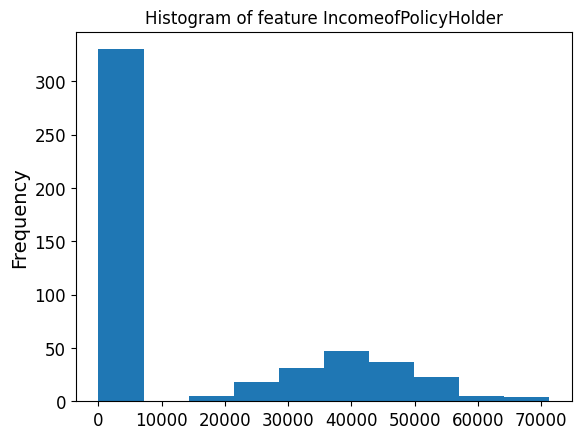

In [70]:
#Another way to plot a histogram
#plt.figure(figsize=(20,10))
df['IncomeofPolicyHolder'].plot(kind='hist', title='Histogram of feature IncomeofPolicyHolder')

<Axes: title={'center': 'Boxplot of feature IncomeofPolicyHolder'}>

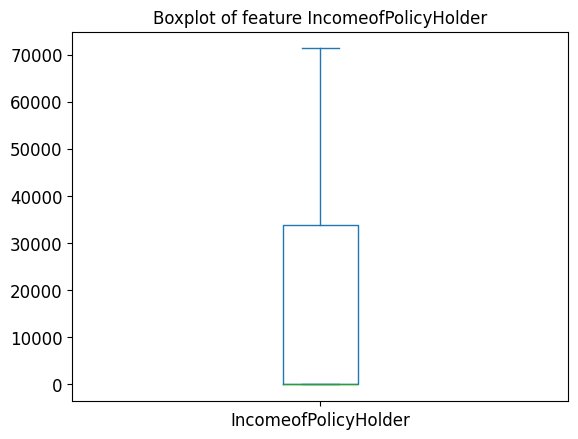

In [71]:
# Plot a boxplot for continuous feature Income
#plt.figure(figsize=(20,10))
df['IncomeofPolicyHolder'].plot(kind='box', title='Boxplot of feature IncomeofPolicyHolder')

In [72]:
df['MaritalStatus'].value_counts(dropna=False)

MaritalStatus
NaN         330
Married      99
Single       48
Divorced     23
Name: count, dtype: int64

<Axes: title={'center': 'Barplot of feature Marital Status'}, xlabel='MaritalStatus'>

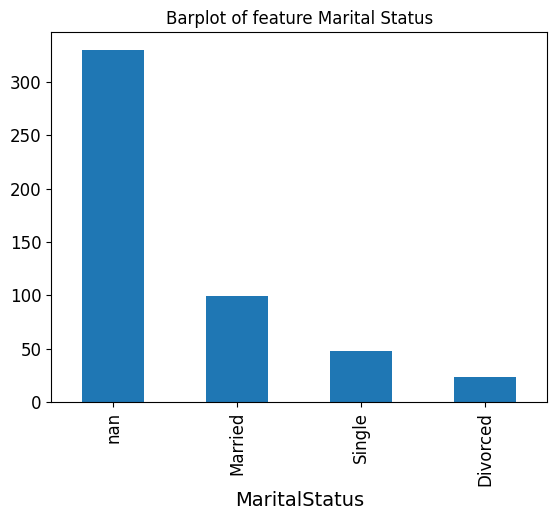

In [73]:
# Plot a barplot for categorical feature 'Marital Status'
df['MaritalStatus'].value_counts(dropna=False).plot(kind='bar', title='Barplot of feature Marital Status')

From the histograms we can quickly see potential invalid data such as negative numbers (ClaimAmount < 0) or very large numbers (TotalClaimed > 700k) or many zeroes (IncomeofPolicyHolder). Another way to see outliers and potential errors is to look at boxplots for each feature.

<Figure size 640x480 with 0 Axes>

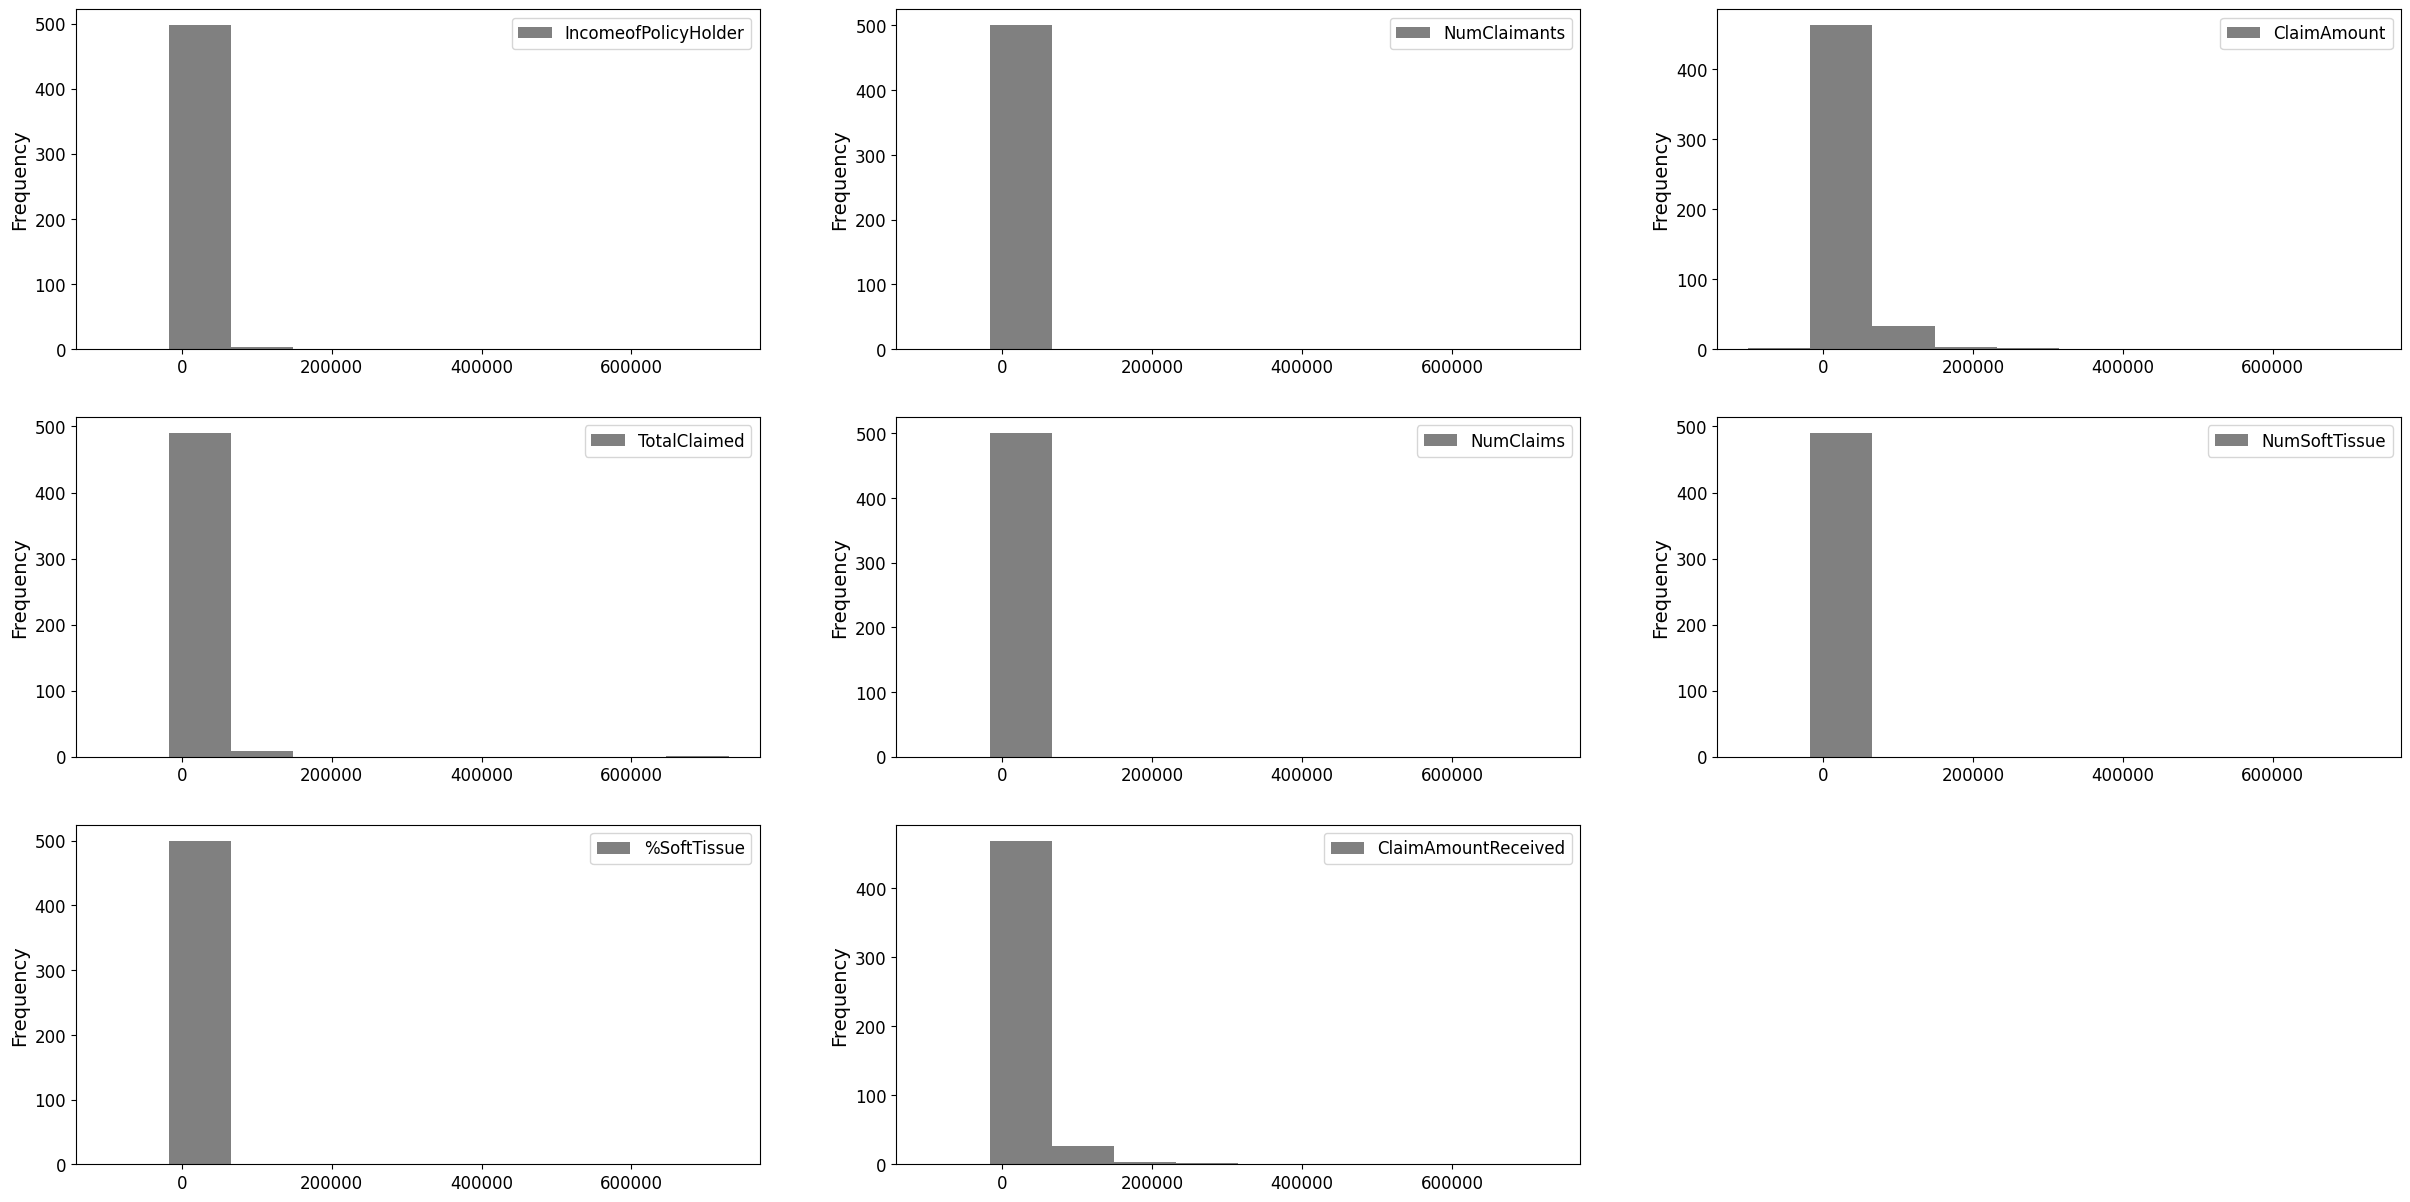

In [74]:
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top
df[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,15), layout=(3,3), sharex=False, sharey=False, color = 'grey')
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-histograms_all_1-1.pdf')

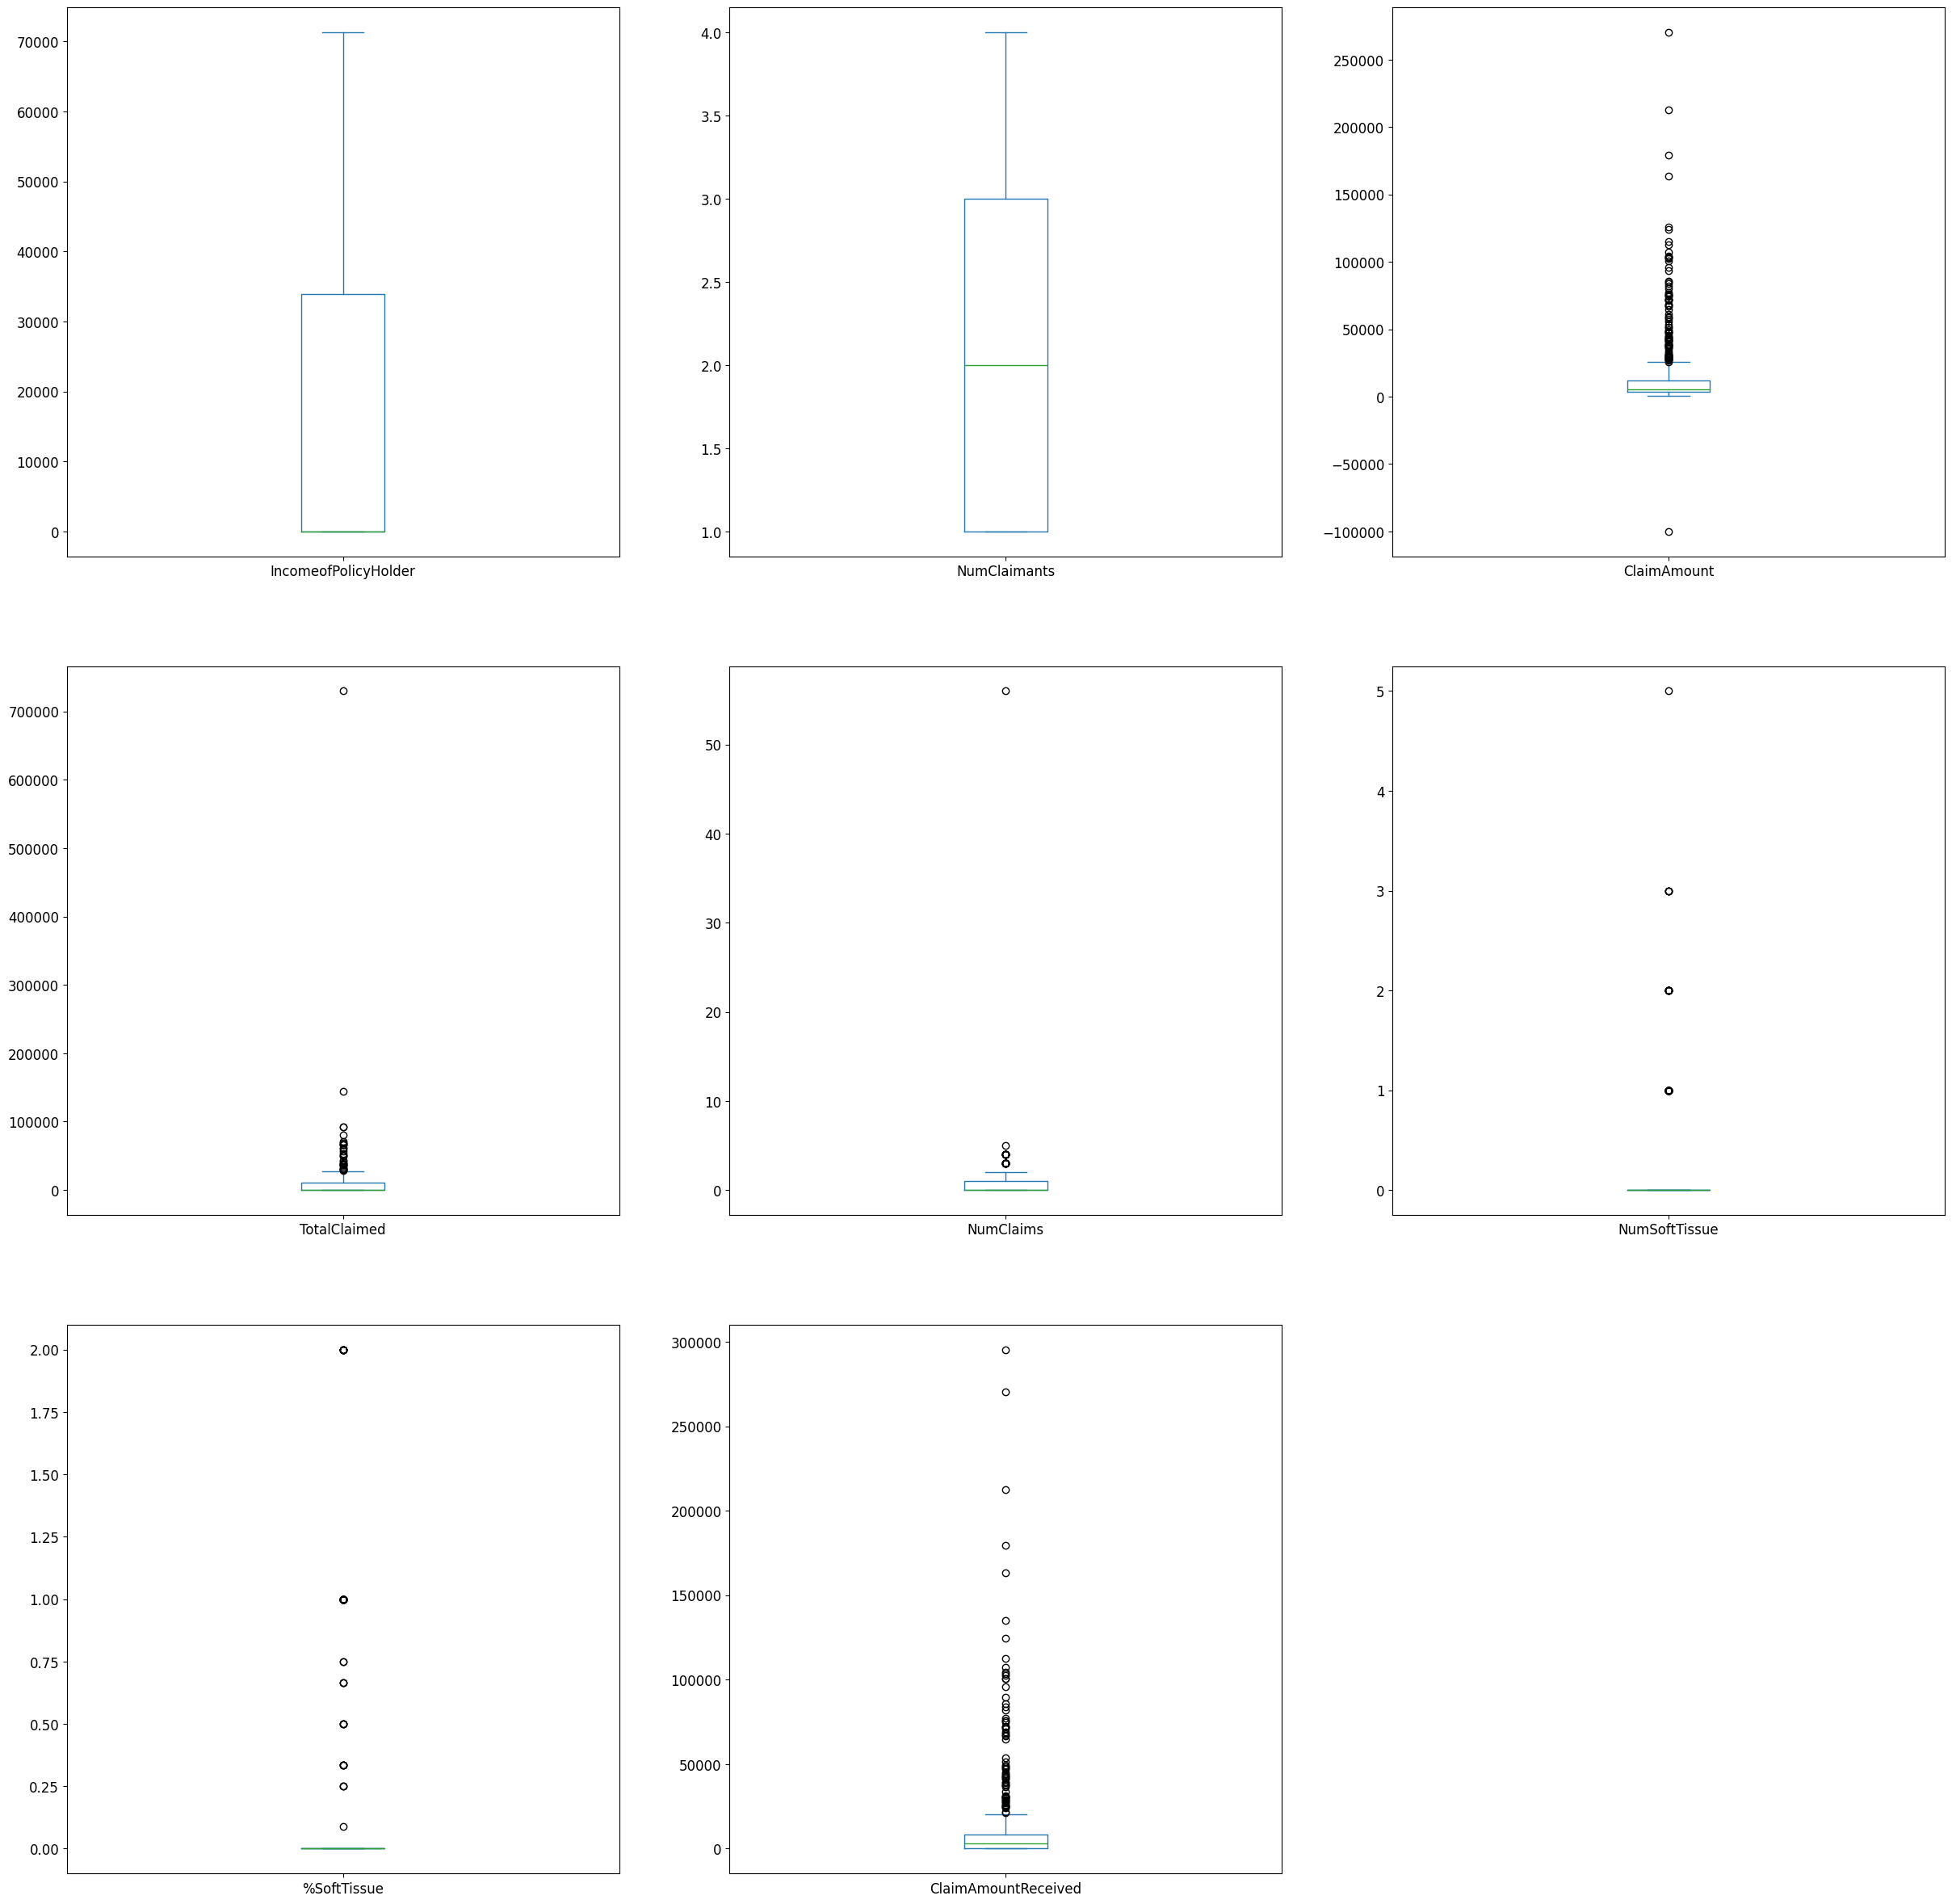

In [75]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-boxplots_all_1-1.pdf')

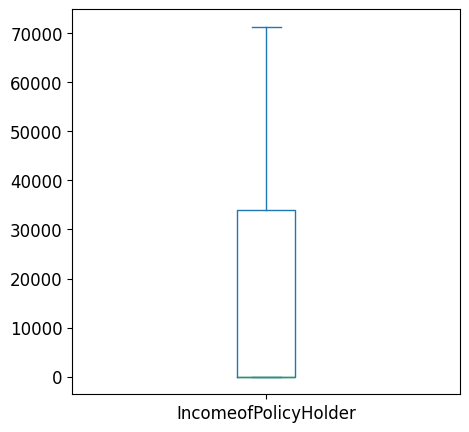

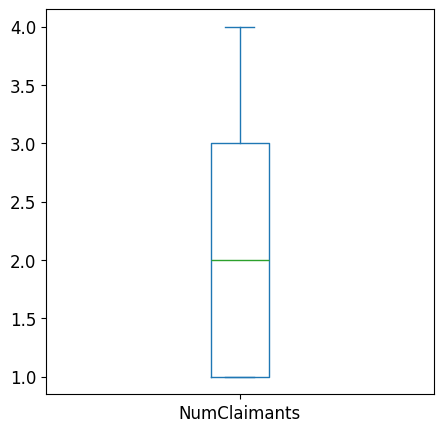

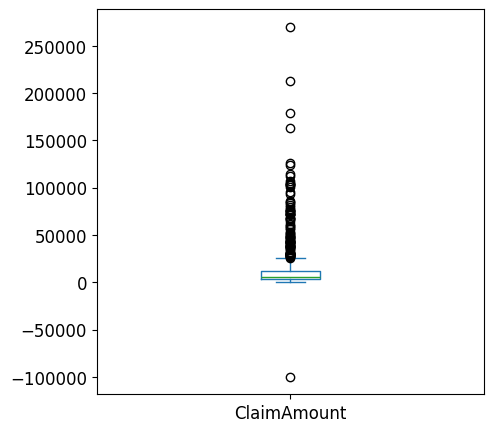

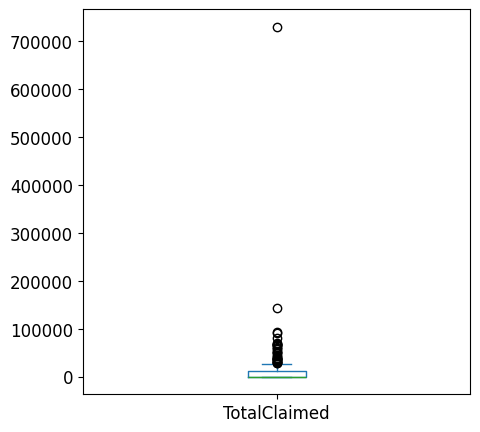

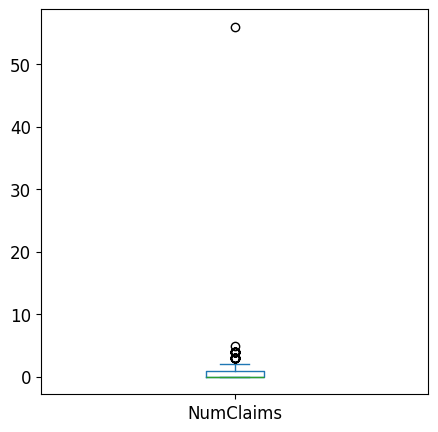

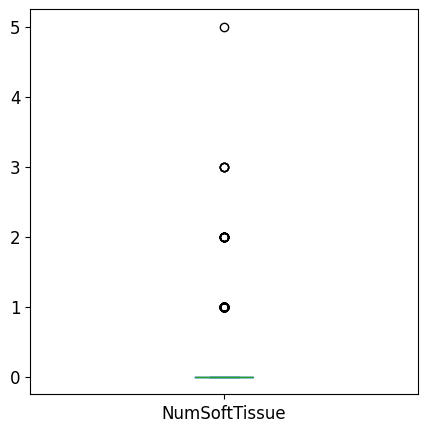

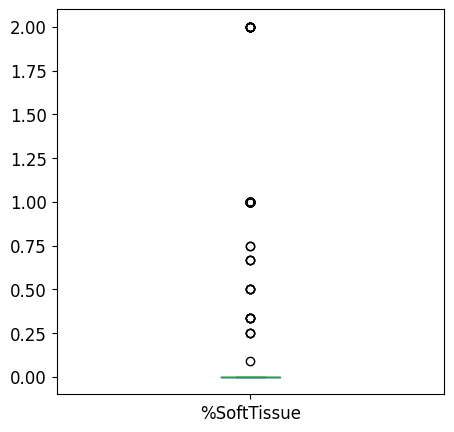

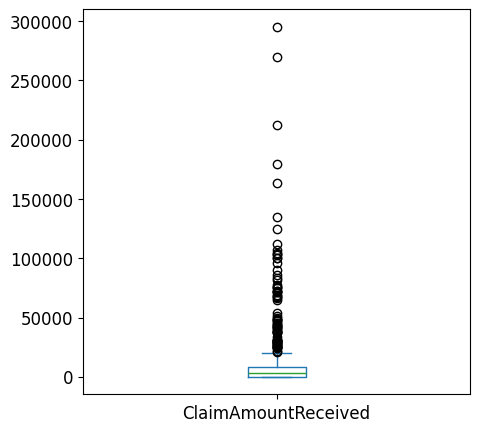

In [76]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('MotorInsurance-DataQualityReport-NumericFeatures_boxplots_1-1.pdf')

for col in numeric_columns:
    f = df[col].plot(kind='box', figsize=(5,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()
    

From the boxplots we can quickly see outliers in some of the features (TotalClaimed and NumClaims).

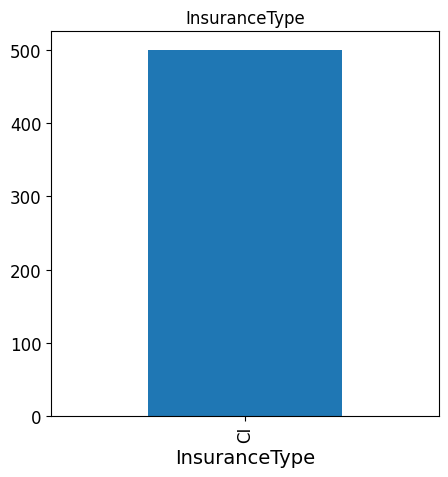

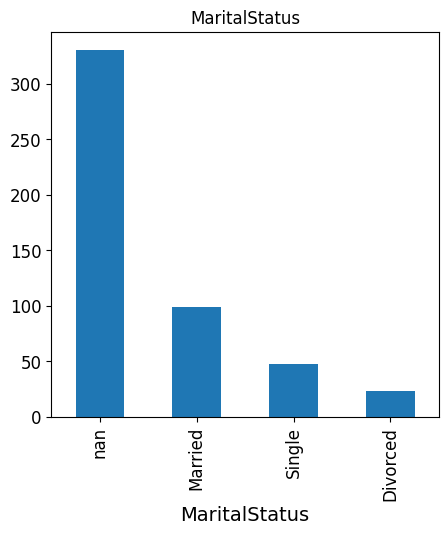

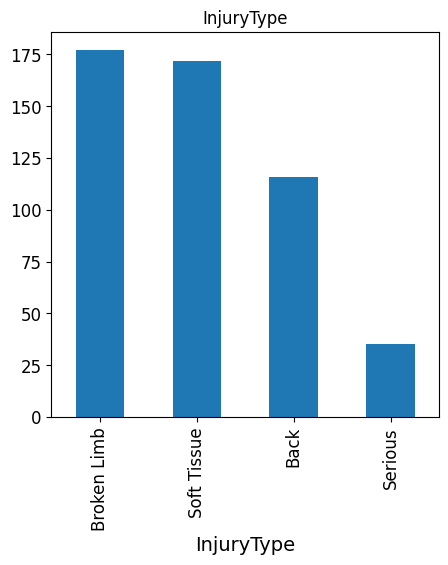

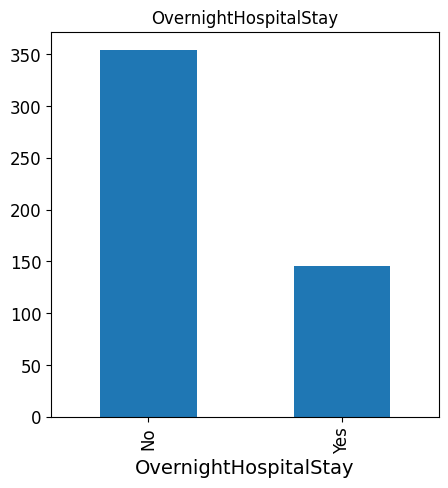

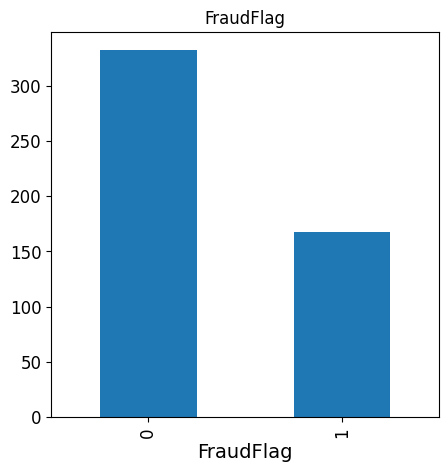

In [77]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('MotorInsurance-DataQualityReport-CategoricalFeatures_barcharts_1-1.pdf')

# We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 
# categorical features.
for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

From the barplots of categorical features we note that InsuranceType has a cardinality of 1 and that MaritalStatus has many missing values. We summarise all the findings from tables and plots in the data quality plan below.

## Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

In [78]:
# List all features that need to be discussed in the data quality plan
df.nunique()

ID                       500
InsuranceType              1
IncomeofPolicyHolder     171
MaritalStatus              3
NumClaimants               4
InjuryType                 4
OvernightHospitalStay      2
ClaimAmount              493
TotalClaimed             235
NumClaims                  7
NumSoftTissue              5
%SoftTissue                9
ClaimAmountReceived      329
FraudFlag                  2
dtype: int64

In [79]:
df.dtypes

ID                         object
InsuranceType            category
IncomeofPolicyHolder        int64
MaritalStatus            category
NumClaimants                int64
InjuryType               category
OvernightHospitalStay    category
ClaimAmount                 int64
TotalClaimed                int64
NumClaims                   int64
NumSoftTissue             float64
%SoftTissue               float64
ClaimAmountReceived         int64
FraudFlag                category
dtype: object

## Exercises

1. **Data Understanding: Data Quality Plan.** Design a data quality plan for the Motor Insurance data. Please describe your thinking around the issues identified and the solutions proposed. The observations are best placed after the tables or plots of the features analysed and summarised together in the plan.


## Data Understanding: Data Quality Plan
For example, a potential data quality plan lists all features and actions involving those features:

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|ID (object)                          |   Unique identifier not to be used as feature in data preparation|Keep to be able to link example to actual customer, but do not use for data preparation|
InsuranceType (category)             | Irregular Cardinality (1)              | Constant column, drop feature       
IncomeofPolicyHolder (int64)       | More than 50% values are 0 | Investigate cause and decide what to do with this feature; seems to be missing values in connection to MaritalStatus; if 0 means missing value, then we have 66% missing values, drop feature|
MaritalStatus (category)             | Missing Values (66%)       | Too many missing values (66%), drop feature  | 
NumClaimants (int64)                 | None | Keep as is|   
InjuryType (category)                | None | Keep as is|
OvernightHospitalStay (category)    | None | Keep as is|
ClaimAmount (int64)                  | Outliers (high) | Clamp high outliers to the 95th percentile (this is around 75k and affects 25 rows).|
TotalClaimed (int64)                 | Outlier, very large value (729k) | Investigate rows where this value appears. If invalid data and only few rows affected, drop rows |    
NumClaims (int64)                    | Outlier, very large value (>50) | Investigate rows where this value appears. If invalid data and only few rows affected, drop rows  |   
NumSoft Tissue (float64)             | Missing values (2%) | Investigate rows affected, consider imputation |
%SoftTissue (float64)               | None | Keep as is|
ClaimAmountReceived (int64)         | Negative feature value (-99,999.0) | Investigate cause of error and how many rows are affected. If invalid data and only few rows affected, drop rows|
ClaimAmountReceived (int64)         | Outliers (high) | Clamp high outliers to the 95th percentile|
FraudFlag                 (category) |Unbalanced number of 0 and 1 (proportion of 0: 66%)  | Leave as is; may consider sampling strategies to balance the training dataset|

2. **Implementing Data Quality Strategies.** Update your csv file to include the actions noted in your data quality plan (e.g., dropped features, dropped examples, outliers, filling missing data).


In [80]:
# Keep a copy of the original data
df_raw = df.copy()

In [81]:
# Drop column InsuranceType
df = df.drop('InsuranceType', axis=1)


In [82]:
# Check if the column was dropped
df.head(1)

,ID,IncomeofPolicyHolder,MaritalStatus,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1


In [83]:
df[df['IncomeofPolicyHolder'] == 0]

,ID,IncomeofPolicyHolder,MaritalStatus,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
3,4,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1
5,6,0,NaN,1,Broken Limb,Yes,17480,0,0,0.0,0.0,17480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,493,0,NaN,1,Soft Tissue,Yes,2569,20055,1,NaN,0.0,2569,0
494,495,0,NaN,2,Back,No,3813,9882,3,0.0,0.0,0,1
495,496,0,NaN,1,Soft Tissue,No,2118,0,0,0.0,0.0,0,1
497,498,0,NaN,1,Broken Limb,Yes,32469,0,0,0.0,0.0,16763,0


In [84]:
df[df['IncomeofPolicyHolder'] == 0].shape

(330, 13)

In [85]:
df[df['MaritalStatus'].isnull()].shape

(330, 13)

Seems that IncomeofPolicyHolder value of 0 corresponds to missing data for MaritalStatus, so for now we will drop this feature.

In [86]:
# Drop column IncomeofPolicyHolder and MaritalStatus
df = df.drop(['IncomeofPolicyHolder', 'MaritalStatus'], axis=1)
df.head()

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In [87]:
df[df['TotalClaimed'] > 700000]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
21,22,3,Back,No,8688,729792,56,5.0,0.089286,8688,0


In [88]:
df[df['NumClaims'] > 50]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
21,22,3,Back,No,8688,729792,56,5.0,0.089286,8688,0


In [89]:
test_outlier_TotalClaimed = df[df['TotalClaimed'] > 700000]
test_outlier_TotalClaimed

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
21,22,3,Back,No,8688,729792,56,5.0,0.089286,8688,0


Drop row as it corresponds to a company claim, rather than an individual claim (see textbook for details).

In [90]:
# Drop row with large outlier
df = df.drop(test_outlier_TotalClaimed.index)

In [91]:
# Check if row was indeed droped
df[df['TotalClaimed'] > 700000]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag


In [92]:
df.head(1)

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1


In [93]:
# Look at rows where 'NumSoftTissue' is missing.
missing_NumSoftTissue = df[df['NumSoftTissue'].isnull()]
missing_NumSoftTissue

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
8,9,1,Soft Tissue,No,2067,0,0,NaN,0.0,2067,0
26,27,3,Broken Limb,Yes,7193,0,0,NaN,0.0,7193,0
146,147,1,Soft Tissue,No,4811,0,0,NaN,0.0,0,1
149,150,2,Back,No,2200,21923,4,NaN,0.0,2200,0
220,221,2,Soft Tissue,No,3383,0,0,NaN,0.0,3383,0
404,405,2,Serious,Yes,7248,0,0,NaN,0.0,7248,0
422,423,3,Broken Limb,No,4197,61915,3,NaN,0.0,4197,0
479,480,1,Broken Limb,No,33739,10608,1,NaN,0.0,33739,0
492,493,1,Soft Tissue,Yes,2569,20055,1,NaN,0.0,2569,0
496,497,4,Broken Limb,Yes,3199,0,0,NaN,0.0,0,1


In [94]:
# Look at rows where 'NumSoftTissue' is not missing and the values for %SoftTissue.
df[df['NumSoftTissue'].notnull()]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
494,495,2,Back,No,3813,9882,3,0.0,0.0,0,1
495,496,1,Soft Tissue,No,2118,0,0,0.0,0.0,0,1
497,498,1,Broken Limb,Yes,32469,0,0,0.0,0.0,16763,0
498,499,1,Broken Limb,No,179448,0,0,0.0,0.0,179448,0


In [95]:
# It seems that when '%SoftTissue' is 0, so is NumSoftTissue, so we will replace Nan with 0.
df['NumSoftTissue'] = df['NumSoftTissue'].replace(np.nan, 0)
df[df['NumSoftTissue'].isnull()]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag


In [96]:
missing_NumSoftTissue.index

Index([8, 26, 146, 149, 220, 404, 422, 479, 492, 496], dtype='int64')

In [97]:
# Look at the rows where we changed the values for NumSoftTissue.
df.loc[missing_NumSoftTissue.index]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
8,9,1,Soft Tissue,No,2067,0,0,0.0,0.0,2067,0
26,27,3,Broken Limb,Yes,7193,0,0,0.0,0.0,7193,0
146,147,1,Soft Tissue,No,4811,0,0,0.0,0.0,0,1
149,150,2,Back,No,2200,21923,4,0.0,0.0,2200,0
220,221,2,Soft Tissue,No,3383,0,0,0.0,0.0,3383,0
404,405,2,Serious,Yes,7248,0,0,0.0,0.0,7248,0
422,423,3,Broken Limb,No,4197,61915,3,0.0,0.0,4197,0
479,480,1,Broken Limb,No,33739,10608,1,0.0,0.0,33739,0
492,493,1,Soft Tissue,Yes,2569,20055,1,0.0,0.0,2569,0
496,497,4,Broken Limb,Yes,3199,0,0,0.0,0.0,0,1


In [98]:
# Look at feature ClaimAmount
df[df['ClaimAmount'] < 0]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
2,3,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0


ClaimAmount and ClaimAmountReceived seem to have same value for all cases with FraudFlag=0. 
We will replace the negative value with the ClaimAmountReceived value.


In [99]:
df['ClaimAmount'] = df['ClaimAmount'].replace(-99999, 572)
df[df['ClaimAmount'] < 0]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag


In [100]:
# Check the row at index 2 to see if ClaimAmount is indeed changed
df.head(3)

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,1,Broken Limb,No,572,0,0,0.0,0.0,572,0


In [101]:
# Stats for numeric features.
df.describe(include=['int', 'float']).T

,count,mean,std,min,25%,50%,75%,max
NumClaimants,499.0,1.905812,1.012545,1.0,1.0,2.0,3.0,4.0
ClaimAmount,499.0,16590.150301,28996.316832,385.0,3311.5,5658.0,12306.0,270200.0
TotalClaimed,499.0,8153.909820,15174.529615,0.0,0.0,0.0,11171.5,144000.0
NumClaims,499.0,0.687375,0.997215,0.0,0.0,0.0,1.0,5.0
NumSoftTissue,499.0,0.220441,0.544692,0.0,0.0,0.0,0.0,3.0
%SoftTissue,499.0,0.172178,0.428429,0.0,0.0,0.0,0.0,2.0
ClaimAmountReceived,499.0,13060.687375,30577.222793,0.0,0.0,3238.0,8118.0,295303.0


In [102]:
#Update the numeric features after dropping some columns.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['NumClaimants', 'ClaimAmount', 'TotalClaimed', 'NumClaims',
       'NumSoftTissue', '%SoftTissue', 'ClaimAmountReceived'],
      dtype='object')

In [103]:
for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts(dropna=False).nlargest(15), "\n\n\n")

NumClaimants
----------

Range NumClaimants is:  3
----------
Value  Number of Instances
NumClaimants
1    235
2    122
3     96
4     46
Name: count, dtype: int64 



ClaimAmount
----------

Range ClaimAmount is:  269815
----------
Value  Number of Instances
ClaimAmount
2390      2
8065      2
3383      2
4384      2
3771      2
5097      2
3640      2
2260      1
3481      1
2067      1
100472    1
47508     1
28765     1
12790     1
2470      1
Name: count, dtype: int64 



TotalClaimed
----------

Range TotalClaimed is:  144000
----------
Value  Number of Instances
TotalClaimed
0         266
1693        1
6959        1
10608       1
6006        1
11116       1
6041        1
20055       1
22095       1
9882        1
37416       1
144000      1
10424       1
2508        1
20137       1
Name: count, dtype: int64 



NumClaims
----------

Range NumClaims is:  5
----------
Value  Number of Instances
NumClaims
0    265
1    188
3     22
4     19
2      4
5      1
Name: count, dtype: int6

In [104]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[numeric_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

NumClaimants                         4
ClaimAmount                          492
TotalClaimed                         234
NumClaims                            6
NumSoftTissue                        4
%SoftTissue                          8
ClaimAmountReceived                  328


In [105]:
df.sort_values(by='ClaimAmount', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
3,4,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
320,321,3,Broken Limb,Yes,212661,12311,1,1.0,1.0,212661,0
498,499,1,Broken Limb,No,179448,0,0,0.0,0.0,179448,0
156,157,1,Broken Limb,No,163390,6313,1,0.0,0.0,163390,0
103,104,2,Broken Limb,No,126046,6897,1,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
181,182,1,Soft Tissue,No,604,0,0,0.0,0.0,604,0
2,3,1,Broken Limb,No,572,0,0,0.0,0.0,572,0
487,488,1,Back,No,467,0,0,0.0,0.0,467,0
304,305,2,Soft Tissue,Yes,399,80603,4,0.0,0.0,399,0


<Axes: >

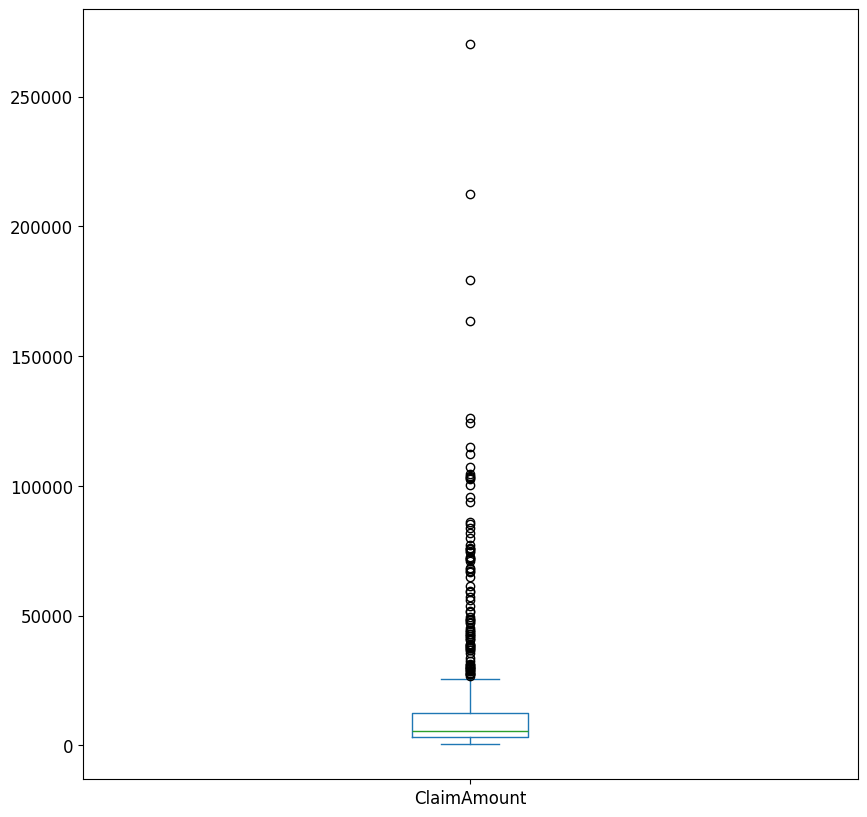

In [106]:
df['ClaimAmount'].plot(kind='box', figsize=(10,10))

In [107]:
perc95 = np.percentile(df['ClaimAmount'], 95)
perc95

75631.9

In [112]:
df[df['ClaimAmount'] > perc95].shape

(25, 11)

In [113]:
perc99 = np.percentile(df['ClaimAmount'], 99)
perc99

124348.63999999997

In [116]:
df[df['ClaimAmount'] > perc99].shape

(5, 11)

In [117]:
df[df['ClaimAmount'] > perc95]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
3,4,3,Serious,Yes,270200,0,0,0.0,0.000000,270200,0
60,61,3,Back,No,81871,0,0,0.0,0.000000,81871,0
99,100,2,Serious,Yes,107324,0,0,0.0,0.000000,107324,0
103,104,2,Broken Limb,No,126046,6897,1,1.0,1.000000,0,1
123,124,1,Soft Tissue,No,102522,0,0,0.0,0.000000,102522,0
136,137,2,Back,Yes,95882,3880,1,0.0,0.000000,95882,0
156,157,1,Broken Limb,No,163390,6313,1,0.0,0.000000,163390,0
195,196,2,Back,Yes,80058,25670,1,2.0,2.000000,295303,0
198,199,1,Broken Limb,No,77165,0,0,0.0,0.000000,77165,0
229,230,1,Soft Tissue,No,93680,9319,4,3.0,0.750000,0,1


In [118]:
# Clamp high outiers for 'ClaimAmount' to perc95. This affects 25 rows in the data.
# The textbook describes an alternative option to clamp by using manual values, eg clamp to [0, 80000].
# Outliers have to be considered carefully as they can be valid data that captures useful information 
# about the problem, so in some cases it is better to keep the outliers.
high_claim_index = df['ClaimAmount'] > perc95
high_claim_index.head()

0    False
1    False
2    False
3     True
4    False
Name: ClaimAmount, dtype: bool

In [119]:
# Change all values above perc95 to the value of perc95
df.loc [high_claim_index, 'ClaimAmount'] = perc95

/var/folders/vf/24jnyyh95pjch979f061f0800000gn/T/ipykernel_67013/1214055707.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75631.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc [high_claim_index, 'ClaimAmount'] = perc95


In [120]:
df[df['ClaimAmount'] > perc95]

,ID,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag


<Axes: >

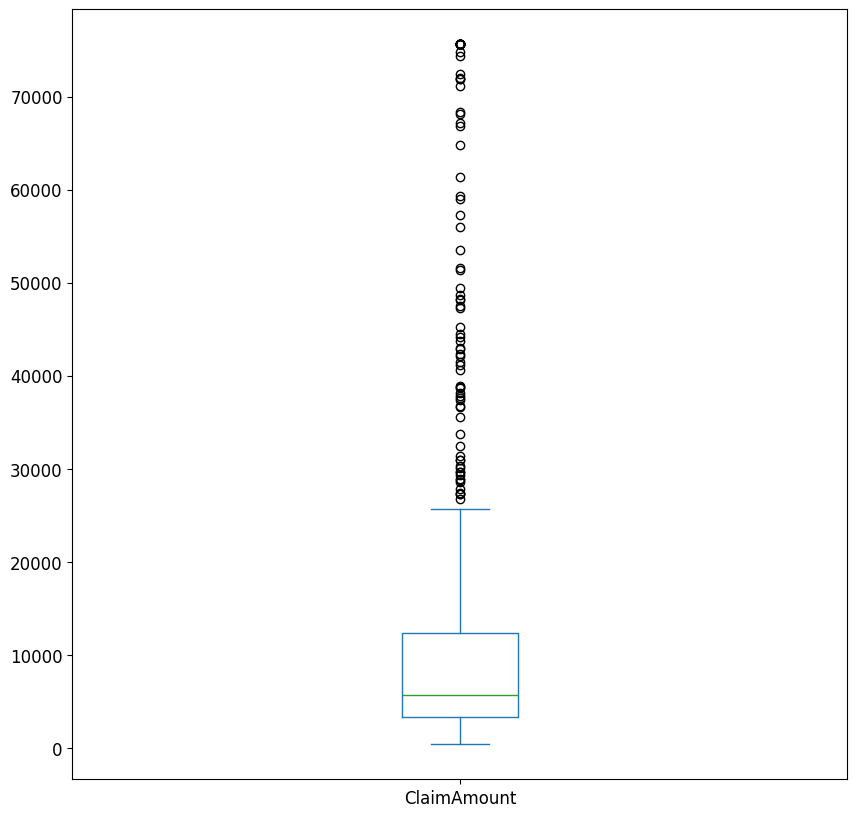

In [121]:
# Replot the clamped feature
df['ClaimAmount'].plot(kind='box', figsize=(10,10))

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     499 non-null    object  
 1   NumClaimants           499 non-null    int64   
 2   InjuryType             499 non-null    category
 3   OvernightHospitalStay  499 non-null    category
 4   ClaimAmount            499 non-null    float64 
 5   TotalClaimed           499 non-null    int64   
 6   NumClaims              499 non-null    int64   
 7   NumSoftTissue          499 non-null    float64 
 8   %SoftTissue            499 non-null    float64 
 9   ClaimAmountReceived    499 non-null    int64   
 10  FraudFlag              499 non-null    category
dtypes: category(3), float64(3), int64(4), object(1)
memory usage: 53.2+ KB


In [123]:
# Stats for numeric features.
df.describe(include=['int', 'float']).T

,count,mean,std,min,25%,50%,75%,max
NumClaimants,499.0,1.905812,1.012545,1.0,1.0,2.0,3.0,4.0
ClaimAmount,499.0,14640.359719,20654.315863,385.0,3311.5,5658.0,12306.0,75631.9
TotalClaimed,499.0,8153.909820,15174.529615,0.0,0.0,0.0,11171.5,144000.0
NumClaims,499.0,0.687375,0.997215,0.0,0.0,0.0,1.0,5.0
NumSoftTissue,499.0,0.220441,0.544692,0.0,0.0,0.0,0.0,3.0
%SoftTissue,499.0,0.172178,0.428429,0.0,0.0,0.0,0.0,2.0
ClaimAmountReceived,499.0,13060.687375,30577.222793,0.0,0.0,3238.0,8118.0,295303.0


In [124]:
# Stats for category features.
df.describe(include="category").T

,count,unique,top,freq
InjuryType,499,4,Broken Limb,177
OvernightHospitalStay,499,2,No,353
FraudFlag,499,2,0,331


In [125]:
df.nunique()

ID                       499
NumClaimants               4
InjuryType                 4
OvernightHospitalStay      2
ClaimAmount              468
TotalClaimed             234
NumClaims                  6
NumSoftTissue              4
%SoftTissue                8
ClaimAmountReceived      328
FraudFlag                  2
dtype: int64

In [126]:
df.isnull().sum()

ID                       0
NumClaimants             0
InjuryType               0
OvernightHospitalStay    0
ClaimAmount              0
TotalClaimed             0
NumClaims                0
NumSoftTissue            0
%SoftTissue              0
ClaimAmountReceived      0
FraudFlag                0
dtype: int64

All features seem ok now, no missing values or strange values.

3. **Clean Data.** Save the new data frame to a file with a name that reflects that the data has been cleaned.

In [127]:
# Write the cleaned dataframe to a csv file
df.to_csv('MotorInsuranceFraudClaimABTFull_round1_cleaned.csv', index=False)